In [1]:
import numpy as np
def euclideanDistance(p1, p2):
    distance = np.sqrt(np.sum((p1 - p2)**2))
    return distance

# The KNN class
class KNN:
    def __init__(self, k):   
        self.k = k
    def train_model(self, X, Y):    # Storing dataset and labels
        self.rating = X
        self.results = Y
        
    def predict_data(self, X):
       
        predictions = []

        for i in range(X.shape[0]):
            # Calculate the distance between each item in X and each item in the data set
            distances = [euclideanDistance(X[i], x) for x in self.rating]
            
            # Slice and selects the first k indices, which correspond to the k closest neighbors.
            indices = np.argsort(distances)[:self.k]
            
            # Get the labels of the k closest neighbors
            kneighbors = [self.results[index] for index in indices]
            
            # Predict the label for the item by selecting the most common label among the k closest neighbors
            label = max(set(kneighbors), key=kneighbors.count)
            predictions.append(label)

        return predictions

# creating instance
knn = KNN(k=3)   

rating = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
results = np.array([1, 1, 0, 1, 0])
knn.train_model(rating, results)


test_data = np.array([[3, 2], [7, 8], [4, 3]])
prediction_result = knn.predict_data(test_data)

print(prediction_result)
labels = ['Best' if isinstance(i, int) and i == 0 else 'Can Watch aslo' for i in range(len(prediction_result))]
print(labels)

[1, 0, 1]
['Best', 'Can Watch aslo', 'Can Watch aslo']


Text(0.5, 1.0, 'Accuracy Score for Different Values of K')

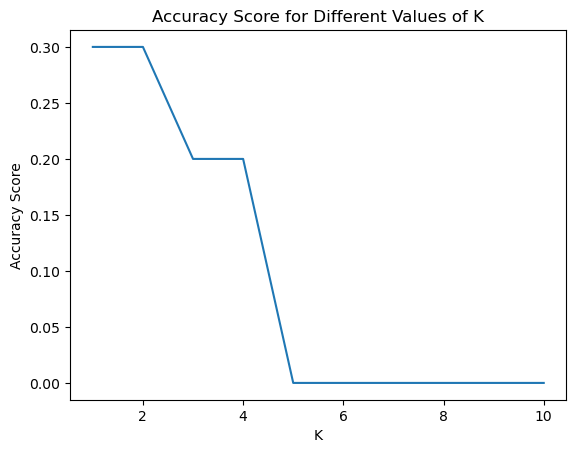

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# a. Read and load the data into the program.
data = pd.read_csv('fruit_data_with_colors _1_.csv')

# b. Prepare the data by eliminating any features that contain text or categorical values.
data = data.select_dtypes(include=[np.number])

# c. Address missing values by replacing them with the mean value of each column, if necessary.
data = data.fillna(data.mean())


# d. Divide the data into training and testing sets, with the first 50 rows being used for training and the remaining 10 rows being used for testing.

train_data = data.iloc[:50, :-1]            # First 50 rows, all columns except the last
lst_col = data.iloc[:50, -1]                # First 50 rows, last column
test_data = data.iloc[50:, :-1]             # Remaining 10 rows, all columns except the last
accuracy_data = data.iloc[50:, -1]          # Remaining 10 rows, last column

# Calulate distance between two points
def euclideanDistance(p1, p2):
    distance = np.sqrt(np.sum((p1 - p2)**2))
    return distance

# The KNN class
class KNN:
    def __init__(self, k):   # Constructor
        self.k = k
        
    def train_model(self, X, Y):
       # Storing dataset and labels
        self.train_data = X
        self.lst_col = Y

        
    def predict_data(self, X):
       
        predictions = []

        for i in range(X.shape[0]):
            # Calculate the distance between each item in X and each item in the data set
            distances = [euclideanDistance(X.iloc[i, :], x) for x in self.train_data.itertuples(index=False)]
            #  the index=False argument is used to exclude the index of each row from the output
            
            # Slice and selects the first k indices, which correspond to the k closest neighbors.
            indices = np.argsort(distances)[:self.k]
            
            # Get the labels of the k closest neighbors
            kneighbors = [self.lst_col.iloc[index] for index in indices]
            
            # Predict the label for the item by selecting the most common label among the k closest neighbors
            label = max(set(kneighbors), key=kneighbors.count)
            predictions.append(label)

        return predictions



# e. Apply the KNN model for different values of K (ranging from 1 to 10) and examine the results.
accuracy_scores = []
for k in range(1, 11):
    knn = KNN(k=k)
    knn.train_model(train_data, lst_col)
    predictions = knn.predict_data(test_data)
    accurate = np.mean(predictions == accuracy_data)
    accuracy_scores.append(accurate)

# f. Plot the accuracy score for each value of K, to visualize the differences.
plt.plot(range(1, 11), accuracy_scores)
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Values of K')